### DATA COLLECTION AND PREPARATION


In [3]:
!python --version


Python 3.12.7


In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn

In [5]:
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("matplotlib",matplotlib.__version__)
print("seaborn",sns.__version__)
print("joblib",joblib.__version__)
print("sklearn",sklearn.__version__)

pandas 2.2.2
numpy 1.26.4
matplotlib 3.9.2
seaborn 0.13.2
joblib 1.4.2
sklearn 1.5.1


In [78]:
#  STEP 1: Load and read dataset
df = pd.read_csv("patient_data.csv")
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [79]:
df.shape

(1825, 14)

In [80]:
df.columns

Index(['C', 'Age', 'History', 'Patient', 'TakeMedication', 'Severity',
       'BreathShortness', 'VisualChanges', 'NoseBleeding', 'Whendiagnoused',
       'Systolic', 'Diastolic', 'ControlledDiet', 'Stages'],
      dtype='object')

In [81]:
df.rename(columns={'C':'Gender'},inplace=True)

In [82]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [83]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).',
       'HYPERTENSIVE CRISI', 'NORMAL'], dtype=object)

In [84]:
df['Stages'].replace({'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
                      'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'},
                       inplace=True)

C:\Users\micky\AppData\Local\Temp\ipykernel_1232\2116711151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stages'].replace({'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',


In [85]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [86]:
df['TakeMedication'].replace({'Yes ': 'Yes',},
                       inplace=True)

C:\Users\micky\AppData\Local\Temp\ipykernel_1232\2180456492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TakeMedication'].replace({'Yes ': 'Yes',},


In [87]:
df['TakeMedication'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
df['NoseBleeding'].replace({'No ': 'No',},
                       inplace=True)

C:\Users\micky\AppData\Local\Temp\ipykernel_1232\132209577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NoseBleeding'].replace({'No ': 'No',},


In [89]:
df['NoseBleeding'].unique()

array(['No', 'Yes'], dtype=object)

In [90]:
df['Systolic'].replace({'121- 130': '121 - 130',},
                       inplace=True)

C:\Users\micky\AppData\Local\Temp\ipykernel_1232\3820876195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Systolic'].replace({'121- 130': '121 - 130',},


In [91]:
df['Systolic'].unique()

array(['111 - 120', '121 - 130', '130+', '100+'], dtype=object)

In [92]:
# Handle missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [93]:
df.shape

(1825, 14)

In [94]:
#checking null values
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [95]:
# Dictionary to store unique values
categorical_unique_values = {}

for col in df.select_dtypes(include=['object', 'category']).columns:
    unique_vals = df[col].dropna().unique()  # Ignore NaN
    categorical_unique_values[col] = list(unique_vals)
    print(f"Column: {col}")
    print("Unique values:", unique_vals)
    print("-" * 40)


Column: Gender
Unique values: ['Male' 'Female']
----------------------------------------
Column: Age
Unique values: ['18-34' '35-50' '51-64' '65+']
----------------------------------------
Column: History
Unique values: ['Yes' 'No']
----------------------------------------
Column: Patient
Unique values: ['No' 'Yes']
----------------------------------------
Column: TakeMedication
Unique values: ['No' 'Yes']
----------------------------------------
Column: Severity
Unique values: ['Mild' 'Sever' 'Moderate']
----------------------------------------
Column: BreathShortness
Unique values: ['No' 'Yes']
----------------------------------------
Column: VisualChanges
Unique values: ['No' 'Yes']
----------------------------------------
Column: NoseBleeding
Unique values: ['No' 'Yes']
----------------------------------------
Column: Whendiagnoused
Unique values: ['<1 Year' '1 - 5 Years' '>5 Years']
----------------------------------------
Column: Systolic
Unique values: ['111 - 120' '121 - 130' '

In [96]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [97]:
# handling categorical values
#converting categorican into numerical values
from sklearn.preprocessing import LabelEncoder
columns=['Gender', 'Age', 'History', 'Patient', 'TakeMedication', 'Severity',
       'BreathShortness', 'VisualChanges', 'NoseBleeding', 'Whendiagnoused',
       'Systolic', 'Diastolic', 'ControlledDiet', 'Stages']
label_encoder = LabelEncoder()
for col in columns:
    df[col]=label_encoder.fit_transform(df[col])

In [98]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,0,1,1,3,0,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0,0


In [99]:
df['Stages'].unique()

array([0, 1, 2, 3])

In [100]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store mappings
category_mappings = {}

# Loop through each categorical column
for col in df.select_dtypes(include=['object', 'category', 'int']).columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # Make sure values are strings
    le.fit(df[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    category_mappings[col] = mapping
    print(f"Column: {col}")
    print("Mapping:", mapping)
    print("-" * 40)


Column: Gender
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: Age
Mapping: {'0': 0, '1': 1, '2': 2, '3': 3}
----------------------------------------
Column: History
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: Patient
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: TakeMedication
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: Severity
Mapping: {'0': 0, '1': 1, '2': 2}
----------------------------------------
Column: BreathShortness
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: VisualChanges
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: NoseBleeding
Mapping: {'0': 0, '1': 1}
----------------------------------------
Column: Whendiagnoused
Mapping: {'0': 0, '1': 1, '2': 2}
----------------------------------------
Column: Systolic
Mapping: {'0': 0, '1': 1, '2': 2, '3': 3}
----------------------------------------
Column: D

In [101]:
# Remove extra spaces and convert
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.apply(pd.to_numeric, errors='ignore')


C:\Users\micky\AppData\Local\Temp\ipykernel_1232\2073986072.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1825 non-null   int64
 1   Age              1825 non-null   int64
 2   History          1825 non-null   int64
 3   Patient          1825 non-null   int64
 4   TakeMedication   1825 non-null   int64
 5   Severity         1825 non-null   int64
 6   BreathShortness  1825 non-null   int64
 7   VisualChanges    1825 non-null   int64
 8   NoseBleeding     1825 non-null   int64
 9   Whendiagnoused   1825 non-null   int64
 10  Systolic         1825 non-null   int64
 11  Diastolic        1825 non-null   int64
 12  ControlledDiet   1825 non-null   int64
 13  Stages           1825 non-null   int64
dtypes: int64(14)
memory usage: 199.7 KB


### EXPLORATORY DATA ANALYSIS

In [103]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,1.441096,0.907945,0.460822,0.592329,1.013151,0.465205,0.484932,0.243836,1.026301,1.572603,2.717808,0.460822,1.145205
std,0.500137,1.098723,0.289183,0.498599,0.491536,0.786287,0.498925,0.499910,0.429512,0.810680,0.712756,1.256490,0.498599,1.096876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,3.000000


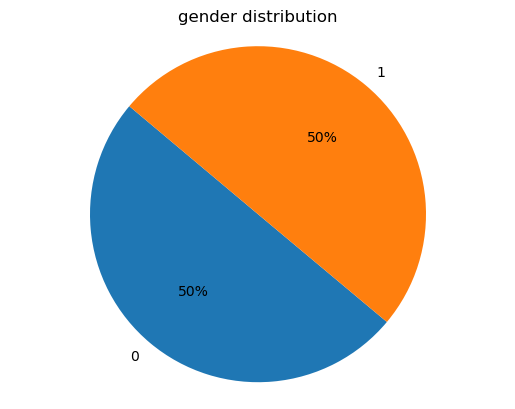

In [104]:
#Univarient Analysis
gender_counts=df['Gender'].value_counts()
#plotting the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('gender distribution')
plt.axis('equal')
plt.show()

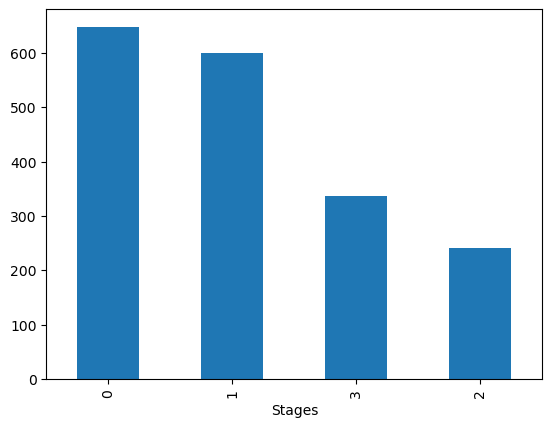

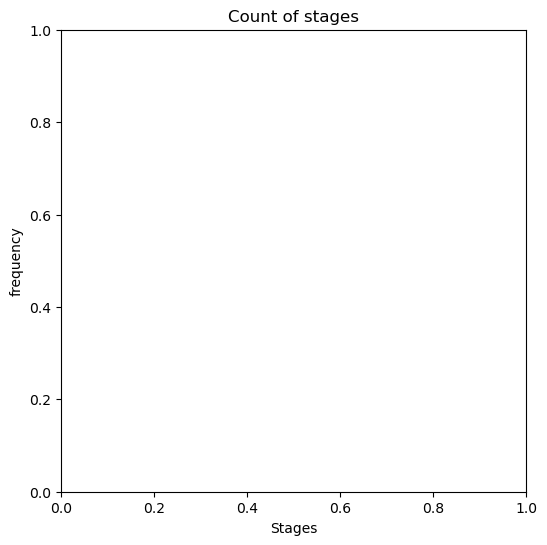

In [105]:
frequency=df['Stages'].value_counts()
frequency.plot(kind='bar')
plt.figure(figsize=(6,6))
plt.xlabel('Stages')
plt.ylabel('frequency')
plt.title('Count of stages')
plt.show()

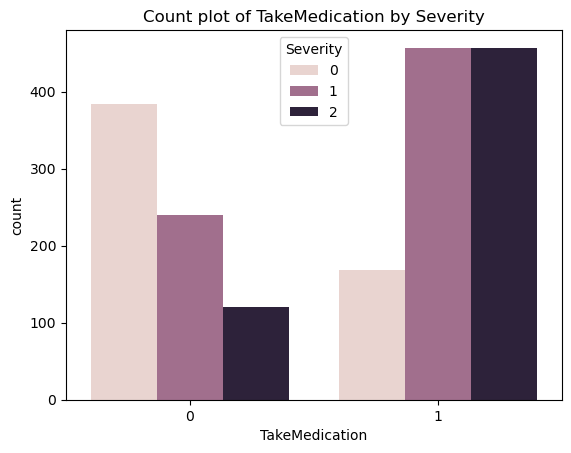

In [106]:
# Bivariate Analysis
sns.countplot(x='TakeMedication', hue='Severity', data=df)
plt.title('Count plot of TakeMedication by Severity')
plt.show()

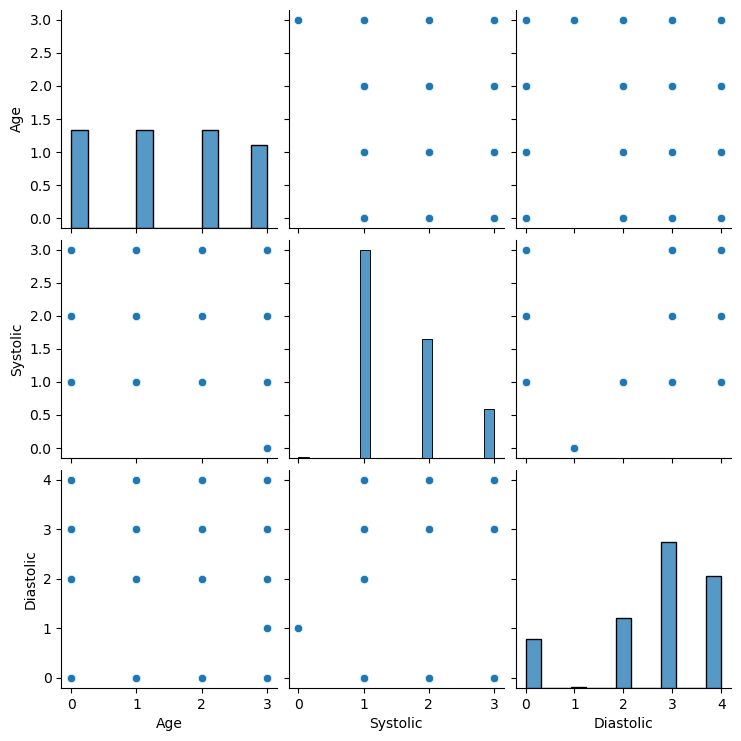

In [107]:
# multivariente Analysis
sns.pairplot(df[['Age', 'Systolic', 'Diastolic']])
plt.show()

In [108]:
# TRAIN TEST SPLIT
#splitting the data into x and y
x=df.drop('Stages', axis=1)
x

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,0,1,1,3,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,0,2,1,2,0
1821,1,2,1,0,0,2,0,0,0,2,1,2,0
1822,0,2,1,0,0,2,0,0,0,2,1,2,0
1823,1,3,1,0,0,2,0,0,0,2,1,2,0


In [109]:
y=df['Stages']
y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int64

In [110]:
#spliting into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=30)

In [111]:
print("i am itishree")

i am itishree


### MODEL BUILDING

In [112]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
acc_lr = accuracy_score(y_test,y_pred)
c_lr = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_lr)
print(c_lr)


Accuracy Score:  0.9780821917808219
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       132
           1       1.00      0.99      1.00       133
           2       0.97      1.00      0.99        34
           3       0.90      1.00      0.95        66

    accuracy                           0.98       365
   macro avg       0.97      0.98      0.98       365
weighted avg       0.98      0.98      0.98       365



C:\Users\micky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# RandomForestClassification
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [114]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)
print('Accurcy Score: ',acc_dt)
print(c_dt)

Accurcy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [115]:
# Gaussian Navies Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_nb)
print(c_nb)

Accuracy Score:  0.8602739726027397
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      0.62      0.76       133
           2       0.40      1.00      0.57        34
           3       1.00      1.00      1.00        66

    accuracy                           0.86       365
   macro avg       0.85      0.90      0.83       365
weighted avg       0.94      0.86      0.87       365



In [116]:
#MultinomialNaveies bayes
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB()
mNB.fit(x_train, y_train)
y_pred=NB.predict(x_test)

acc_mnb = accuracy_score(y_test,y_pred)
c_mnb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_mnb)
print(c_mnb)

Accuracy Score:  0.8602739726027397
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      0.62      0.76       133
           2       0.40      1.00      0.57        34
           3       1.00      1.00      1.00        66

    accuracy                           0.86       365
   macro avg       0.85      0.90      0.83       365
weighted avg       0.94      0.86      0.87       365



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1825 non-null   int64
 1   Age              1825 non-null   int64
 2   History          1825 non-null   int64
 3   Patient          1825 non-null   int64
 4   TakeMedication   1825 non-null   int64
 5   Severity         1825 non-null   int64
 6   BreathShortness  1825 non-null   int64
 7   VisualChanges    1825 non-null   int64
 8   NoseBleeding     1825 non-null   int64
 9   Whendiagnoused   1825 non-null   int64
 10  Systolic         1825 non-null   int64
 11  Diastolic        1825 non-null   int64
 12  ControlledDiet   1825 non-null   int64
 13  Stages           1825 non-null   int64
dtypes: int64(14)
memory usage: 199.7 KB


In [118]:
#prediction = random_forest.predict([[0,3,0,2,0,0,1,6,0,0,0,0,0]])
# Input values for a new patient
new_patient = pd.DataFrame([[0, 3, 0, 2, 0, 0, 1, 6, 0, 0, 0, 0, 0]],
                           columns=['Gender', 'Age', 'History', 'Patient', 'TakeMedication', 
                                    'Severity', 'BreathShortness', 'VisualChanges', 
                                    'NoseBleeding', 'Whendiagnoused', 'Systolic', 
                                    'Diastolic', 'ControlledDiet'])
# Make prediction
prediction = random_forest.predict(new_patient)
print("Predicted stage:", prediction)


Predicted stage: [1]


In [119]:
prediction[0]

1

In [120]:
# testing Model With Multiple Evaluation Metrics
model = pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier','RandomForest Classifier',
                               'Gaussian Naive Bayes','Multinational Naive Bayes'],
                      'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_mnb]
                     })

In [121]:
model

,Model,Score
0,Linear Regression,0.978082
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Naive Bayes,0.860274
4,Multinational Naive Bayes,0.860274


In [122]:
# save the best model
import pickle 
import warnings
pickle.dump(random_forest,open("model.pkl","wb"))